## Melanoma Detection Assignment

By Wasim Khan

### Problem statement: 
To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization

Note: This notebook is created and processed on Google colab, so the necessary sign-in and data uploading process needs to be followed accordingly

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


In [3]:
# Loading the Data set
# Please give the path of zipped dataset
!unzip "/content/gdrive/MyDrive/CNN_assignment.zip"

Archive:  /content/gdrive/MyDrive/CNN_assignment.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024707.jpg  
  inflating

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
## Creating train & validation dataset from the train directory with a batch size of 32 .
## Resized images to 180*180.
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

Always a good practice to split the dataset into training and validation. Here we are using 80% image for training and 20% for validation

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

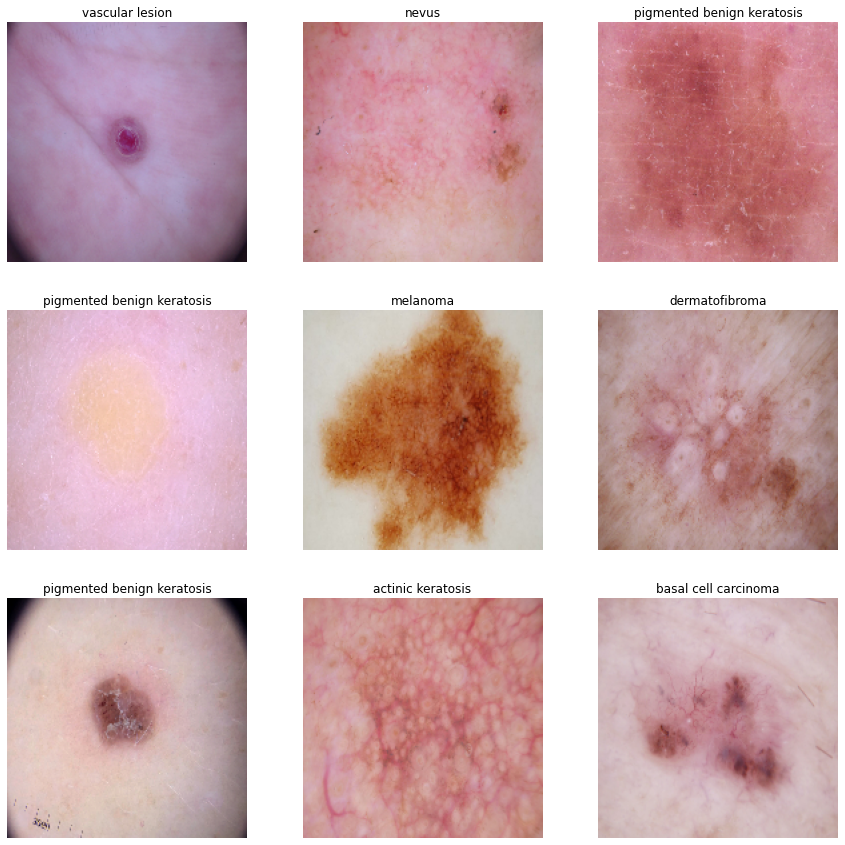

In [10]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
## Creating a code to visualize one instance of all the nine classes present in the dataset 
## using range as 9 for second for loop as there are 9 classes
plt.figure(figsize=(15, 15))

for images, labels in train_ds.take(1):
  for i in range(9):  
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [12]:
### Your code goes here

## Creating a CNN model, which can accurately detect 9 classes present in the dataset.
num_classes = 9
model = Sequential()

#Standardizing values to be in the range of [0, 1] by using a Rescaling layer.
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height,img_width,3)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='Same',input_shape=(img_height,img_width,3)))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='Same',))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='Same',))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='Same',))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='Same',))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [13]:
### Todo, choose an appropirate optimiser and loss function

## Choosing the optimiser as adamax optimizer and loss function as SparseCategoricalCrossentropy for model training

model.compile(optimizer='adamax',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 90, 90, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 45, 45, 64)        1

### Train the model

In [15]:
## Training the model for ~20 epochs.
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


56/56 [==============================] - 50s 135ms/step - loss: 2.0180 - accuracy: 0.2288 - val_loss: 1.9551 - val_accuracy: 0.2640
Epoch 2/20
56/56 [==============================] - 4s 78ms/step - loss: 1.7804 - accuracy: 0.3655 - val_loss: 1.6972 - val_accuracy: 0.3937
Epoch 3/20
56/56 [==============================] - 4s 77ms/step - loss: 1.5839 - accuracy: 0.4286 - val_loss: 1.5996 - val_accuracy: 0.3982
Epoch 4/20
56/56 [==============================] - 4s 78ms/step - loss: 1.5685 - accuracy: 0.4436 - val_loss: 1.5633 - val_accuracy: 0.4430
Epoch 5/20
56/56 [==============================] - 4s 78ms/step - loss: 1.4547 - accuracy: 0.4849 - val_loss: 1.4473 - val_accuracy: 0.5056
Epoch 6/20
56/56 [==============================] - 4s 77ms/step - loss: 1.3983 - accuracy: 0.5000 - val_loss: 1.3963 - val_accuracy: 0.5034
Epoch 7/20
56/56 [==============================] - 4s 77ms/step - loss: 1.3436 - accuracy: 0.5212 - val_loss: 1.4109 - val_accuracy: 0.4877
Epoch 8/20
56/56 [====

### Visualizing training results

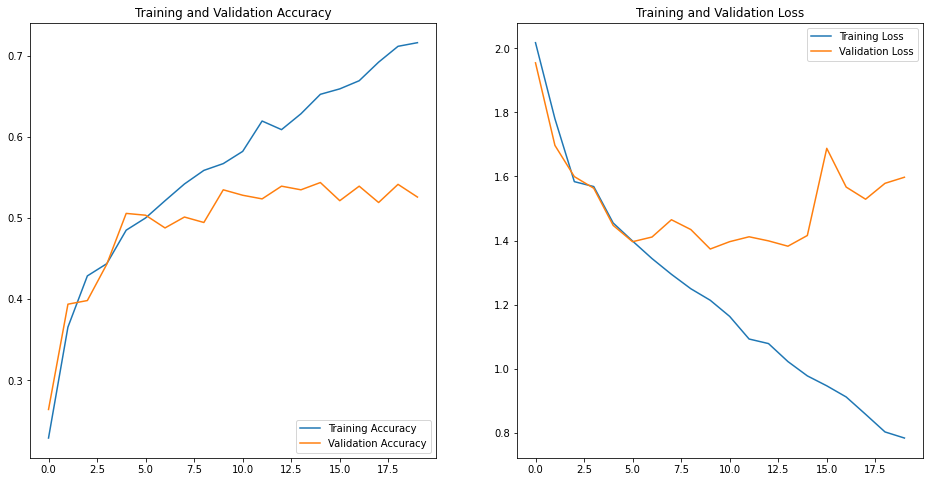

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

### Finding:

We can see from the plots, training accuracy and validation accuracy are off by large margin

In the plots above, the training accuracy is increasing linearly over time, whereas validation accuracy stalls around in the training process. Also, the difference in accuracy between training and validation accuracy is noticeable—a sign of **Overfitting**


When there are a small number of training examples, the model sometimes learns from noises or unwanted details from training examples—to an extent that it negatively impacts the performance of the model on new examples. This phenomenon is known as overfitting. It means that the model will have a difficult time generalizing on a new dataset.

There are multiple ways to fight overfitting in the training process. We will use data augmentation and adding Dropout to our model.

##### Data augmentation strategy to resolve overfitting 

**Implementing data augmentation using the layers from tf.keras.layers.experimental.preprocessing.**

In [17]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augmentation = Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2,fill_mode="reflect"),
])

Let's visualize what a few augmented examples look like by applying data augmentation to the same image several times:

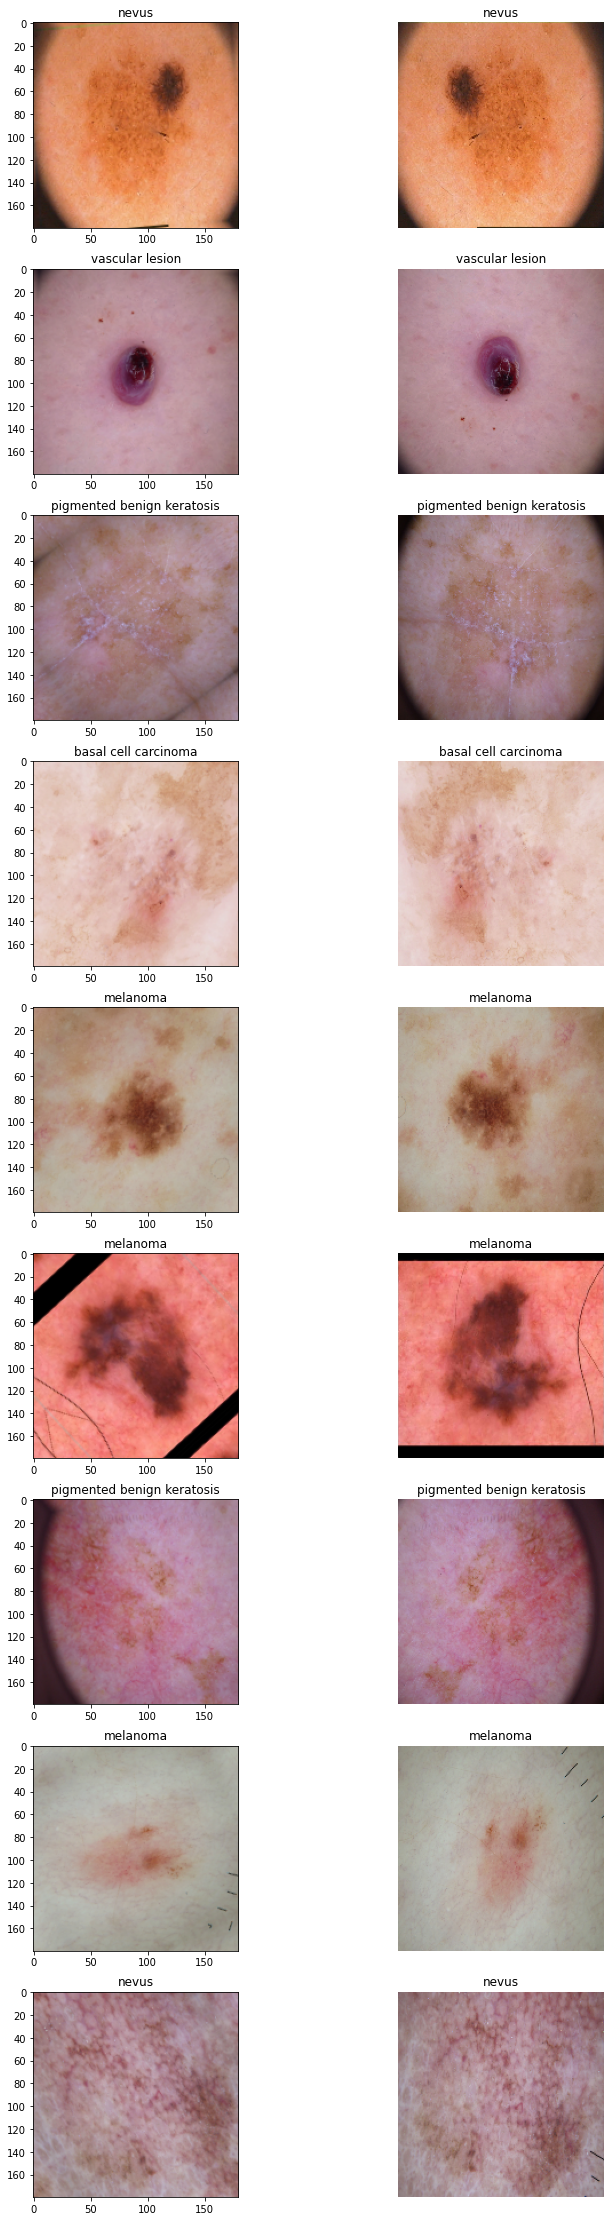

In [18]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(12, 40))
for images, labels in list(train_ds.take(1)):
  augmented_image = data_augmentation(images)
  j=1
  for i in range(9):
    ax = plt.subplot(9, 2, j)
    plt.imshow(augmented_image[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    j+=1

    ax = plt.subplot(9, 2, j)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
    j+=1

  plt.show()

We will use data augmentation to train a model in a moment.

### Todo:
### Create the model, compile and train the model


Dropout is other technique to reduce overfitting of the network which is kind of regularization.

In [19]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
num_classes = 9
model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=(img_height, img_width, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))
## Dropping out 20% of the output units randomly from the layer
model.add(Dropout(0.2))

model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
model.add(MaxPooling2D(pool_size = (2, 2)))
## Dropping out 20% of the output units randomly from the layer
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
## Dropping out 20% of the output units randomly from the layer
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
## Dropping out 40% of the output units randomly from the layer
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


### Compiling the model

In [20]:
## Your code goes here
model.compile(optimizer='adamax',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 180, 180, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 90, 90, 32)        9248      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 90, 90, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)       

### Training the model

In [21]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


56/56 [==============================] - 6s 86ms/step - loss: 2.0998 - accuracy: 0.1931 - val_loss: 2.0916 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 5s 82ms/step - loss: 2.0391 - accuracy: 0.1936 - val_loss: 2.0493 - val_accuracy: 0.1924
Epoch 3/20
56/56 [==============================] - 5s 82ms/step - loss: 1.9648 - accuracy: 0.2790 - val_loss: 1.8715 - val_accuracy: 0.3154
Epoch 4/20
56/56 [==============================] - 5s 82ms/step - loss: 1.7805 - accuracy: 0.3516 - val_loss: 1.8325 - val_accuracy: 0.3445
Epoch 5/20
56/56 [==============================] - 5s 82ms/step - loss: 1.7266 - accuracy: 0.3862 - val_loss: 1.7605 - val_accuracy: 0.3893
Epoch 6/20
56/56 [==============================] - 5s 82ms/step - loss: 1.6810 - accuracy: 0.3956 - val_loss: 1.6508 - val_accuracy: 0.4340
Epoch 7/20
56/56 [==============================] - 5s 82ms/step - loss: 1.6293 - accuracy: 0.4146 - val_loss: 1.6085 - val_accuracy: 0.4340
Epoch 8/20
56/56 [======

### Visualizing the results

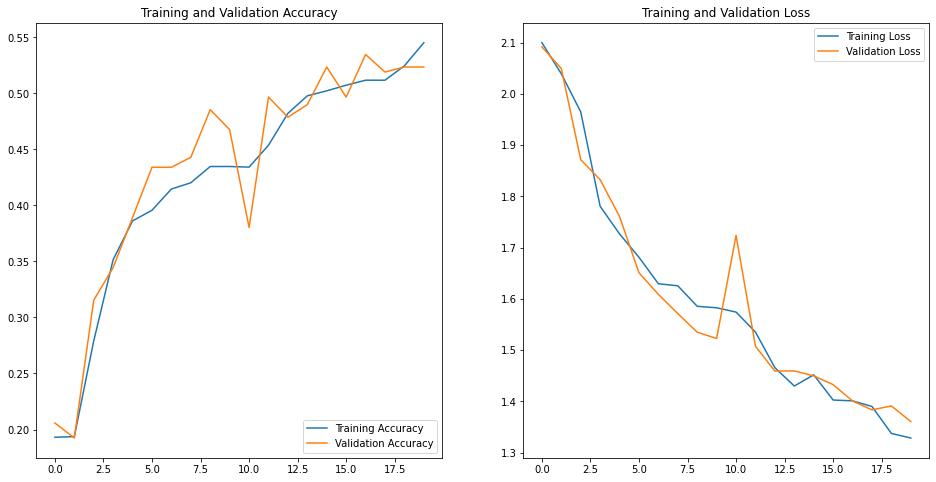

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

### Findings

- From the plots we understand that difference between the margins of training and validation has decreased considerably after data augmentation and adding dropout layer

- Other thing also to be considered is that training accuracy has decreased to a great extent 

- It can be seen there is improvement in the model as compared to the previous model

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [23]:
## Your code goes here.
df  = []
for i in class_names:
  path_list = [x for x in data_dir_train.glob(i+'/*.jpg')]
  df.append(len(path_list))
df = pd.DataFrame(list(zip(class_names,df)),columns=["class","counts"])
print(df)

                        class  counts
0           actinic keratosis     114
1        basal cell carcinoma     376
2              dermatofibroma      95
3                    melanoma     438
4                       nevus     357
5  pigmented benign keratosis     462
6        seborrheic keratosis      77
7     squamous cell carcinoma     181
8             vascular lesion     139


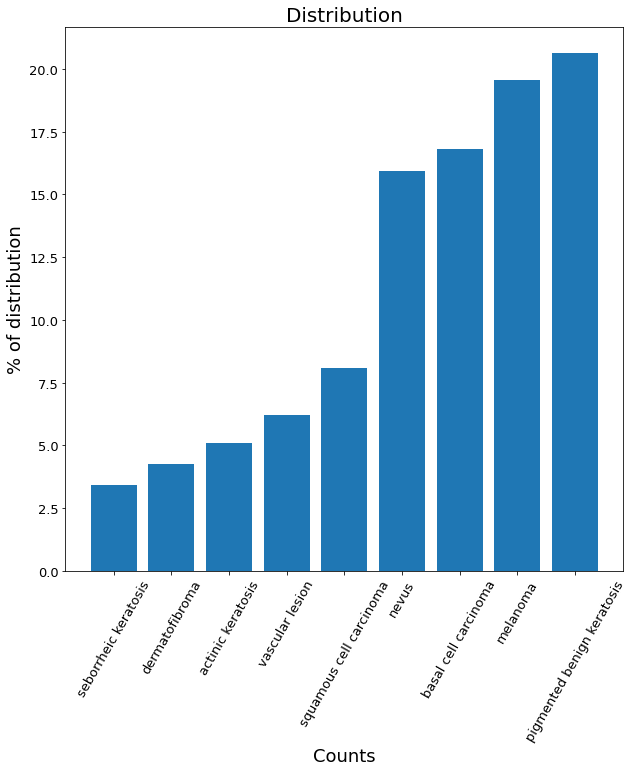

In [24]:
df['counts'] = (df['counts']/sum(df.counts))*100
df.sort_values(by="counts",inplace=True)
plt.figure(figsize=(10,10))
plt.bar(x = df["class"],height=df['counts'])
plt.yticks(fontsize=13)
plt.xlabel('Counts',fontsize = 18)
plt.ylabel('% of distribution',fontsize = 18)
plt.title('Distribution',fontsize=20)
plt.xticks(fontsize = 13,rotation=60)
plt.show()

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
**Ans:** seborrheic keratosis has the least number of samples.




---


#### - Which classes dominate the data in terms proportionate number of samples?
**Ans:** nevus, basal cell carcinoma, melanoma and pigmented benign keratosis dominates the data in terms of proportionate number of sample.

In [25]:
path_list = [x for x in data_dir_train.glob(os.path.join( '*', '*.jpg'))]
print("path_list: ",len(path_list))
lesion_list = [os.path.basename(os.path.dirname(y)) for y in data_dir_train.glob(os.path.join( '*', '*.jpg'))]
print("lesion_list: ",len(lesion_list))
dataframe_dict = dict(zip(path_list, lesion_list))

path_list:  2239
lesion_list:  2239


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [26]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [27]:
path_to_training_dataset="/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F111E3F3790>: 100%|██████████| 500/500 [00:18<00:00, 26.81 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F119B0ACE10>: 100%|██████████| 500/500 [00:18<00:00, 26.82 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F11977A4510>: 100%|██████████| 500/500 [00:18<00:00, 26.46 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F1213700810>: 100%|██████████| 500/500 [01:31<00:00,  5.48 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F119AFA4E10>: 100%|██████████| 500/500 [01:33<00:00,  5.37 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F119AC7FF50>: 100%|██████████| 500/500 [00:19<00:00, 25.66 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F119B335E90>: 100%|██████████| 500/500 [00:45<00:00, 10.93 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F1213763510>: 100%|██████████| 500/500 [00:18<00:00, 27.03 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1197A0AE50>: 100%|██████████| 500/500 [00:18<00:00, 27.54 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [28]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [29]:
import glob

In [30]:
path_list = [x for x in data_dir_train.glob(os.path.join( '*','output', '*.jpg'))]
path_list

[PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0001152.jpg_5a18a392-079d-433e-9ece-5c5a550bb5a9.jpg'),
 PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010730.jpg_418de444-41e4-4b7e-ad38-a30001886dd4.jpg'),
 PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010876.jpg_c227cf6a-520b-42fd-9b29-d1d938b99e3b.jpg'),
 PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010466.jpg_9e9ae591-8382-4c13-a805-48be3af13b8e.jpg'),
 PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010580.jpg_08cade51-a13b-4b8a-a271-05ff7a89a447.jpg'),
 PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_001111

In [31]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in data_dir_train.glob(os.path.join( '*','output', '*.jpg'))]
lesion_list_new

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [32]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [33]:
dataframe_dict

{PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0010267.jpg'): 'melanoma',
 PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0010580.jpg'): 'melanoma',
 PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0010576.jpg'): 'melanoma',
 PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0001103.jpg'): 'melanoma',
 PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0011135.jpg'): 'melanoma',
 PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0010476.jpg'): 'melanoma',
 PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0000311.jpg'): 'melanoma',
 PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0009868.jpg'): 'melanoma',
 PosixPath('Skin cancer ISIC The

In [34]:
dataframe_dict = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])
dataframe_dict

,Path,Label
0,Skin cancer ISIC The International Skin Imagin...,melanoma
1,Skin cancer ISIC The International Skin Imagin...,melanoma
2,Skin cancer ISIC The International Skin Imagin...,melanoma
3,Skin cancer ISIC The International Skin Imagin...,melanoma
4,Skin cancer ISIC The International Skin Imagin...,melanoma
...,...,...
2234,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
2235,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
2236,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
2237,Skin cancer ISIC The International Skin Imagin...,actinic keratosis


In [35]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = dataframe_dict.append(df2)

In [36]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

In [37]:
new_df.Label.count()

6739

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [38]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [39]:
data_dir_train="/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [40]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (without normalization)

**Note**: Adding this model to check the differece in the model with and without Batch normalization. This model is created after re-balancing and **without normalization**

The purpose is only for to choose a good model. Model with Batch noramlization is created below and all the models will be compared at the end 

In [41]:
## your code goes here
## your code goes here
num_classes = 9
model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=(img_height, img_width, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))
## Dropping out 20% of the output units randomly from the layer
model.add(Dropout(0.2))

model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
model.add(MaxPooling2D(pool_size = (2, 2)))
## Dropping out 20% of the output units randomly from the layer
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
## Dropping out 20% of the output units randomly from the layer
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
## Dropping out 40% of the output units randomly from the layer
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [42]:
## your code goes here


## Choosing the optimiser as adamax optimizer and loss function as SparseCategoricalCrossentropy for model training
model.compile(optimizer='adamax',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 180, 180, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 90, 90, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 90, 90, 32)        9248      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 90, 90, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 45, 45, 32)       

#### **Todo:**  Train your model

In [43]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


169/169 [==============================] - 32s 180ms/step - loss: 2.1962 - accuracy: 0.1358 - val_loss: 2.1715 - val_accuracy: 0.1715
Epoch 2/30
169/169 [==============================] - 30s 175ms/step - loss: 1.9865 - accuracy: 0.2120 - val_loss: 1.8629 - val_accuracy: 0.2502
Epoch 3/30
169/169 [==============================] - 30s 173ms/step - loss: 1.8011 - accuracy: 0.2917 - val_loss: 1.7666 - val_accuracy: 0.3482
Epoch 4/30
169/169 [==============================] - 30s 175ms/step - loss: 1.6958 - accuracy: 0.3490 - val_loss: 1.5985 - val_accuracy: 0.3935
Epoch 5/30
169/169 [==============================] - 30s 174ms/step - loss: 1.5950 - accuracy: 0.3922 - val_loss: 1.4888 - val_accuracy: 0.4454
Epoch 6/30
169/169 [==============================] - 30s 175ms/step - loss: 1.5246 - accuracy: 0.4139 - val_loss: 1.4704 - val_accuracy: 0.4350
Epoch 7/30
169/169 [==============================] - 31s 175ms/step - loss: 1.4711 - accuracy: 0.4403 - val_loss: 1.3739 - val_accuracy: 0.4

#### **Todo:**  Visualize the model results

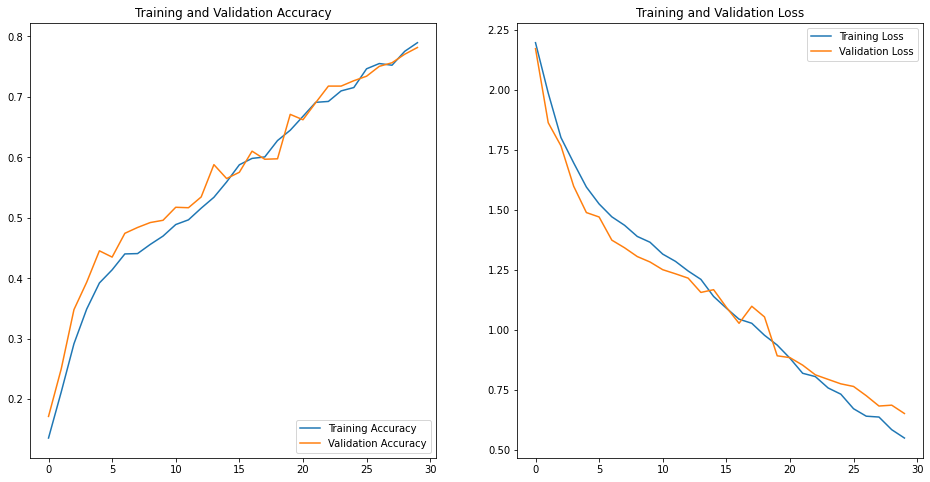

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:** Create your model (make sure to include normalization)

**Note**: This model is created after the **re-balancing and including batch normalization**

In [45]:
## your code goes here
## your code goes here
num_classes = 9
model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=(img_height, img_width, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
## Dropping out 20% of the output units randomly from the layer
model.add(Dropout(0.2))

model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
## Dropping out 20% of the output units randomly from the layer
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
## Dropping out 20% of the output units randomly from the layer
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
## Dropping out 40% of the output units randomly from the layer
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [46]:
## your code goes here


## Choosing the optimiser as adamax optimizer and loss function as SparseCategoricalCrossentropy for model training
model.compile(optimizer='adamax',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 180, 180, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 180, 180, 32)      128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 90, 90, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 90, 90, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 90, 90, 32)       

#### **Todo:**  Train your model

In [47]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


169/169 [==============================] - 33s 186ms/step - loss: 2.2283 - accuracy: 0.2808 - val_loss: 5.2863 - val_accuracy: 0.1151
Epoch 2/30
169/169 [==============================] - 32s 185ms/step - loss: 1.6672 - accuracy: 0.3678 - val_loss: 3.1358 - val_accuracy: 0.2390
Epoch 3/30
169/169 [==============================] - 32s 186ms/step - loss: 1.5558 - accuracy: 0.4095 - val_loss: 2.7800 - val_accuracy: 0.2955
Epoch 4/30
169/169 [==============================] - 32s 184ms/step - loss: 1.4493 - accuracy: 0.4368 - val_loss: 1.5355 - val_accuracy: 0.4788
Epoch 5/30
169/169 [==============================] - 32s 184ms/step - loss: 1.3735 - accuracy: 0.4750 - val_loss: 1.3177 - val_accuracy: 0.5338
Epoch 6/30
169/169 [==============================] - 32s 183ms/step - loss: 1.2882 - accuracy: 0.5104 - val_loss: 1.5063 - val_accuracy: 0.5056
Epoch 7/30
169/169 [==============================] - 32s 184ms/step - loss: 1.1821 - accuracy: 0.5488 - val_loss: 1.2059 - val_accuracy: 0.5

#### **Todo:**  Visualize the model results

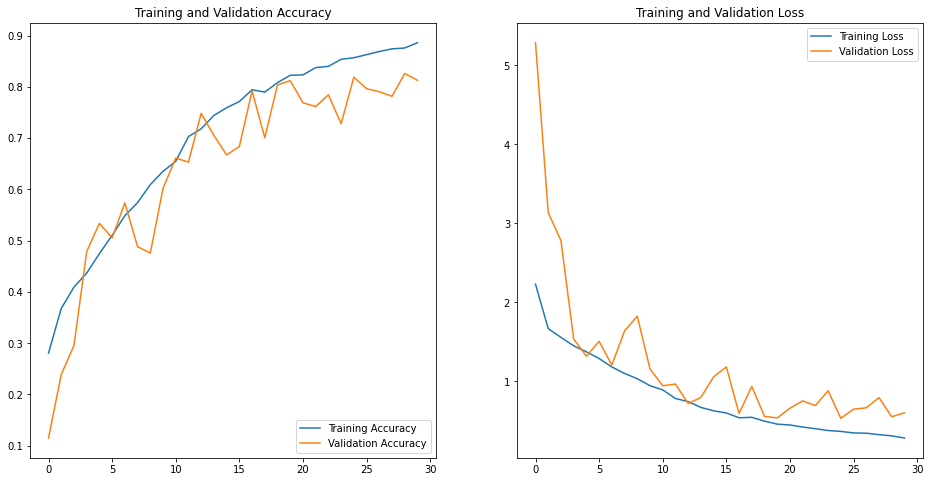

In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



**Answer:**
- Handling class imbalance and Batch normalization did help to minimize ande get rid of overfitting. There is less overfitting than before, and training and validation accuracy are closer aligned.

- Also to notice, in the 3rd model without batch normailzation we see lesser overfitting than that in the 4th model with batch normalization

- Model with normalization has higher training and validation accuracy than that of model without batch normalization

### Model Details

**Model 1: Base model**

Accuracy ≈ 72%

Validation Accuracy ≈ 53%

Inerence:
- This is the basic model which we can clearly see that is overfitting. We then used various techniques to reduce overfit

---

**Model 2: Base model + Dropout layer**

Accuracy ≈ 55%

Validation Accuracy ≈ 52%

Inference:
- After applying data augmentation and Dropout, there is less overfitting than before, and training and validation accuracy are closer aligned.

- But there is also a decrease in the model's accuracy

---

**Model 3: Base model + Dropout layer + Class rebalancing**

Accuracy ≈ around 79%

Validation Accuracy ≈ around 78%

Inference:
- Model accuracy increases after handling class imbalance

- There is also a minimal difference in the training and validation accuracy ranges which makes this model a perfect to use

---

**Model 4: Base model + Dropout layer + Class rebalancing + Batch normalization**

Accuracy ≈ around 89%

Validation Accuracy ≈ around 81%

Inference:
- After Batch normalization we see there is good amount of rise in both training and validation accuracy 

- There is a very small amount of training and validation range difference which is being observed in this model 